# DConfusion Live Presentation Demo

**Interactive notebook for presenting DConfusion's key features**

Run each cell incrementally during your presentation, or run all cells at once for a complete demo.

---

## Setup - Import Library

First, let's import DConfusion:

In [31]:
from dconfusion import DConfusion
import warnings
warnings.filterwarnings('ignore')  # Clean output for presentation

print("✓ DConfusion loaded successfully!")

✓ DConfusion loaded successfully!


---

# DEMO 1: The Problem - Basic Metrics Miss Critical Issues

**Scenario:** You have a confusion matrix with seemingly decent metrics...

In [32]:
# Create a confusion matrix
cm = DConfusion(
    true_positive=10,
    false_negative=5,
    false_positive=3,
    true_negative=12
)

print(f"Accuracy:  {cm.get_accuracy():.2%}")
print(f"Precision: {cm.get_precision():.2%}")
print(f"Recall:    {cm.get_recall():.2%}")
print("\n→ Seems okay, right? Let's check for issues...")

Accuracy:  73.33%
Precision: 76.92%
Recall:    66.67%

→ Seems okay, right? Let's check for issues...


In [33]:
# Check for warnings - this is where DConfusion shines!
cm.print_warnings()


CONFUSION MATRIX ANALYSIS WARNINGS


WARNING (4):
--------------------------------------------------------------------------------
[WARNING] Sample Size: Total sample size (30) is small. Metric uncertainty is approximately 1.8x higher than with 100 samples.
  → Recommendation: Collect 70 more samples to reduce uncertainty, or report confidence intervals with all metrics.

[WARNING] Class Imbalance: Minority class (negative) has only 15 samples. Metrics for this class will have high uncertainty.
  → Recommendation: Collect at least 30 samples of the negative class for reliable metric estimates.

[WARNING] High Metric Uncertainty: Metric uncertainty is high (±8.1% for accuracy). With n=30, differences smaller than ~16.1% may not be meaningful.
  → Recommendation: Need 120 samples to halve the uncertainty, or always report confidence intervals when comparing models.

[WARNING] Poor Basic Rates: One or more basic rates are below 0.7: Sensitivity/Recall (TPR=0.667).
  → Recommendation: Hig

**Key Takeaway:** Most tools would stop at the metrics. DConfusion warns you about sample size, uncertainty, and reliability issues.

---

# DEMO 2: Research-Based Warning System

## Example: Perfect Classification (Suspicious!)

100% accuracy is rare in practice - often indicates data leakage:

In [34]:
# Perfect model - 100% accuracy
perfect_model = DConfusion(
    true_positive=50,
    false_negative=0,
    false_positive=0,
    true_negative=50
)

print(f"Accuracy: {perfect_model.get_accuracy():.2%}")
print("\nWarnings:")
print("="*80)
perfect_model.print_warnings()

Accuracy: 100.00%

Warnings:

CONFUSION MATRIX ANALYSIS WARNINGS


WARNING (1):
--------------------------------------------------------------------------------
[WARNING] Perfect Classification: Model achieved perfect classification (100% accuracy). This is rare in practice.
  → Recommendation: Verify: (1) No data leakage between train/test sets, (2) Proper cross-validation, (3) Target variable not included as feature, (4) Test set is representative of real data. Perfect results often indicate methodological issues.


INFO (1):
--------------------------------------------------------------------------------
[INFO] Metric Selection Guidance: Different metrics emphasize different aspects of classifier performance. No single metric is 'best' for all contexts.
  → Recommendation: Report multiple metrics: (1) All four basic rates (Sensitivity, Specificity, Precision, NPV), (2) A summary metric appropriate for your use case (MCC for balanced view, F1 for precision-recall tradeoff, etc.), (3)

**Key Takeaway:** DConfusion automatically flags perfect classification and suggests checking for data leakage - a costly mistake to miss!

---

# DEMO 3: Statistical Testing - Bootstrap Confidence Intervals

## How uncertain are our metrics really?

Let's quantify the uncertainty in our accuracy estimate:

In [35]:
# Create a more substantial model
model = DConfusion(
    true_positive=85,
    false_negative=15,
    false_positive=10,
    true_negative=90
)

print(f"Model Performance:")
print(f"Accuracy:  {model.get_accuracy():.3f}")
print(f"Precision: {model.get_precision():.3f}")
print(f"Recall:    {model.get_recall():.3f}")

Model Performance:
Accuracy:  0.875
Precision: 0.895
Recall:    0.850


In [36]:
# Calculate bootstrap confidence interval
result = model.get_bootstrap_confidence_interval(
    metric='accuracy',
    confidence_level=0.95,
    n_bootstrap=1000,
    random_state=42
)

print("\n📊 Bootstrap Analysis (1000 samples):")
print("="*50)
print(f"Accuracy:    {result['point_estimate']:.3f}")
print(f"95% CI:      [{result['lower']:.3f}, {result['upper']:.3f}]")
print(f"Std Error:   {result['std_error']:.4f}")
print("\n→ This quantifies our uncertainty!")


📊 Bootstrap Analysis (1000 samples):
Accuracy:    0.875
95% CI:      [0.825, 0.915]
Std Error:   0.0233

→ This quantifies our uncertainty!


**Key Takeaway:** Bootstrap gives you confidence intervals for any metric - know your uncertainty!

---

# DEMO 4: McNemar's Test - Statistical Model Comparison

## Are two models really different?

Let's compare two models statistically:

In [37]:
# Model A - slightly better accuracy
model_a = DConfusion(
    true_positive=85,
    false_negative=15,
    false_positive=10,
    true_negative=90
)

# Model B - slightly worse accuracy
model_b = DConfusion(
    true_positive=80,
    false_negative=20,
    false_positive=8,
    true_negative=92
)

print("Model Comparison:")
print("="*50)
print(f"Model A Accuracy: {model_a.get_accuracy():.3f}")
print(f"Model B Accuracy: {model_b.get_accuracy():.3f}")
print(f"Difference:       {abs(model_a.get_accuracy() - model_b.get_accuracy()):.3f}")
print("\nMost tools would pick Model A...")
print("\nBut let's check if the difference is statistically significant:")

Model Comparison:
Model A Accuracy: 0.875
Model B Accuracy: 0.860
Difference:       0.015

Most tools would pick Model A...

But let's check if the difference is statistically significant:


In [38]:
# Run McNemar's test
result = model_a.mcnemar_test(model_b, alpha=0.05)

print("\n📊 McNemar's Test Results:")
print("="*50)
print(f"Test Statistic:  {result['statistic']:.4f}")
print(f"P-value:         {result['p_value']:.4f}")
print(f"Significant:     {result['significant']}")
print(f"\nInterpretation: {result['interpretation']}")
print("\n→ The difference is NOT statistically significant!")


📊 McNemar's Test Results:
Test Statistic:  1.3333
P-value:         0.2482
Significant:     False

Interpretation: No significant difference between models (p=0.2482)

→ The difference is NOT statistically significant!


**Key Takeaway:** Don't be fooled by small differences. McNemar's test tells you if models are truly different.

---

# DEMO 5: Cost-Sensitive Analysis - Real Business Impact

## Medical Diagnosis Scenario

Missing a disease (False Negative) is MUCH more costly than a false alarm (False Positive):

In [39]:
# Medical diagnosis model
medical_model = DConfusion(
    true_positive=85,
    false_negative=15,  # 15 missed diagnoses!
    false_positive=10,
    true_negative=90
)

print("Medical Diagnosis Model:")
print("="*50)
print(f"Accuracy: {medical_model.get_accuracy():.2%}")
print(f"Recall (Sensitivity): {medical_model.get_recall():.2%}")
print(f"\nConfusion Matrix:")
print(f"  TP: {medical_model.true_positive}  |  FN: {medical_model.false_negative}  ← 15 missed cases!")
print(f"  FP: {medical_model.false_positive}  |  TN: {medical_model.true_negative}")

Medical Diagnosis Model:
Accuracy: 87.50%
Recall (Sensitivity): 85.00%

Confusion Matrix:
  TP: 85  |  FN: 15  ← 15 missed cases!
  FP: 10  |  TN: 90


In [40]:
# Calculate business cost
print("\n💰 Cost Analysis:")
print("="*50)
print("Cost Structure:")
print("  • False Positive (unnecessary test): $100")
print("  • False Negative (missed disease):   $10,000")

total_cost = medical_model.get_misclassification_cost(
    cost_fp=100,
    cost_fn=10000
)

print(f"\nTotal Cost:        ${total_cost:,}")
print(f"Cost per patient:  ${total_cost/medical_model.total:.2f}")
print("\n→ That's expensive! Can we do better?")


💰 Cost Analysis:
Cost Structure:
  • False Positive (unnecessary test): $100
  • False Negative (missed disease):   $10,000

Total Cost:        $151,000.0
Cost per patient:  $755.00

→ That's expensive! Can we do better?


In [41]:
# Find optimal metric for this cost structure
recommendation = medical_model.find_optimal_metric_for_cost(
    cost_fp=100,
    cost_fn=10000
)

print("\n🎯 Metric Recommendation:")
print("="*50)
print(f"Optimize for:     {recommendation['primary_recommendation'].upper()}")
print(f"Cost ratio FN/FP: {recommendation['cost_ratio_fn_to_fp']:.1f}x")
print(f"\nWhy? {recommendation['explanation']}")
print(f"\n{recommendation['interpretation']}")


🎯 Metric Recommendation:
Optimize for:     RECALL
Cost ratio FN/FP: 100.0x

Why? False negatives are 100.0x more costly than false positives. Prioritize RECALL (sensitivity) to minimize missed positive cases.

Extremely high cost for false negatives - typical in critical medical diagnoses, safety systems


In [42]:
# Compare with alternative model
alternative_model = DConfusion(
    true_positive=95,
    false_negative=5,   # Only 5 missed diagnoses!
    false_positive=25,  # More false alarms
    true_negative=75
)

comparison = medical_model.compare_cost_with(
    alternative_model,
    cost_fp=100,
    cost_fn=10000
)

print("\n📊 Model Comparison by Cost:")
print("="*50)
print(f"Current Model:")
print(f"  Accuracy: {medical_model.get_accuracy():.2%}")
print(f"  Cost:     ${comparison['model1_total_cost']:,}")
print(f"\nAlternative Model:")
print(f"  Accuracy: {alternative_model.get_accuracy():.2%}")
print(f"  Cost:     ${comparison['model2_total_cost']:,}")
print(f"\nCost Savings: ${abs(comparison['cost_savings']):,}")
print(f"Better Model: {comparison['better_model']}")
print(f"\n→ {comparison['recommendation']}")


📊 Model Comparison by Cost:
Current Model:
  Accuracy: 87.50%
  Cost:     $151,000.0

Alternative Model:
  Accuracy: 85.00%
  Cost:     $52,500.0

Cost Savings: $98,500.0
Better Model: model2

→ Model 2 is more cost-effective


**Key Takeaway:** Alternative model has LOWER accuracy but LOWER cost! Cost-sensitive analysis connects ML to business ROI.

---

# DEMO 6: Metric Completion - Exact Reconstruction

## The Showstopper Feature!

**Scenario:** You're reading a research paper that reports:
- 200 test samples  
- 85% accuracy
- 80% precision  
- 75% recall

**Question:** Can we reconstruct their confusion matrix? **YES!**

In [43]:
# Reconstruct confusion matrix from reported metrics (N=200 for excellent precision)
reconstructed = DConfusion.from_metrics(
    total_samples=200,
    accuracy=0.85,
    precision=0.80,
    recall=0.75
)

print("🔍 Reconstructed Confusion Matrix:")
print("="*50)
print(f"True Positives:   {reconstructed.true_positive}")
print(f"False Negatives:  {reconstructed.false_negative}")
print(f"False Positives:  {reconstructed.false_positive}")
print(f"True Negatives:   {reconstructed.true_negative}")
print(f"\nTotal: {reconstructed.total} samples ✓")

🔍 Reconstructed Confusion Matrix:
True Positives:   50
False Negatives:  17
False Positives:  12
True Negatives:   121

Total: 200 samples ✓


In [45]:
# Now we can calculate metrics they DIDN'T report!
print("\n📈 Calculate Unreported Metrics:")
print("="*50)
print(f"Specificity:    {reconstructed.get_specificity():.3f}")
print(f"F1 Score:       {reconstructed.get_f1_score():.3f}")
print(f"MCC:            {reconstructed.get_mcc():.3f}")  # Clean alias!
print(f"NPV:            {reconstructed.get_npv():.3f}")  # New method!
print(f"Cohen's Kappa:  {reconstructed.get_cohens_kappa():.3f}")

# Verify reconstruction - check how close we got
print("\n\n🔍 Verify Reconstruction Quality:")
print("="*50)
print(f"Original metrics:")
print(f"  Accuracy:  0.850")
print(f"  Precision: 0.800")  
print(f"  Recall:    0.750")

print(f"\nReconstructed metrics:")
print(f"  Accuracy:  {reconstructed.get_accuracy():.3f}")
print(f"  Precision: {reconstructed.get_precision():.3f}")
print(f"  Recall:    {reconstructed.get_recall():.3f}")

# Calculate differences
acc_diff = abs(reconstructed.get_accuracy() - 0.85)
prec_diff = abs(reconstructed.get_precision() - 0.80)
rec_diff = abs(reconstructed.get_recall() - 0.75)

print(f"\nDifferences:")
print(f"  Accuracy:  {acc_diff:.4f} (error: {acc_diff*100:.2f}%)")
print(f"  Precision: {prec_diff:.4f} (error: {prec_diff*100:.2f}%)")
print(f"  Recall:    {rec_diff:.4f} (error: {rec_diff*100:.2f}%)")

# Check with 0.5% tolerance (excellent precision with N=200!)
consistency = reconstructed.check_metric_consistency({
    'accuracy': 0.85,
    'precision': 0.80,
    'recall': 0.75
}, tolerance=0.005)  # 0.5% tolerance

if consistency['consistent']:
    print("\n✓ Excellent reconstruction! All metrics within 0.5% of target.")
else:
    print("\n→ Note: Small reconstruction error due to integer constraints.")
    max_error = max(acc_diff, prec_diff, rec_diff) * 100
    print(f"  Maximum error: {max_error:.2f}%")
    
print("\n→ Successfully reverse-engineered the confusion matrix structure!")
print("  Now we can calculate ANY metric, even those not in the paper.")


📈 Calculate Unreported Metrics:
Specificity:    0.910
F1 Score:       0.775


AttributeError: 'DConfusion' object has no attribute 'get_mcc'

**Key Takeaway:** Reconstruct confusion matrices from research papers - validate and extend published results!

**Why the small differences?**
- Confusion matrices have **discrete integer counts** (you can't have 26.7 true positives!)
- Metrics like 0.80 precision might not be exactly achievable with integer counts
- The reconstruction finds the **closest valid integer matrix**
- Differences are typically < 2%, which is excellent for practical use

**Why this still matters:**
- ✓ Gives you the approximate structure from incomplete data
- ✓ Lets you calculate metrics that weren't reported
- ✓ Validates that reported metrics are mathematically feasible
- ✓ Essential for reproducible research and paper validation

**Bonus:** Let's see what happens with truly contradictory metrics...

---

In [ ]:
# Bonus: What if you don't provide enough metrics?
print("⚠️  Bonus Example: Insufficient Information")
print("="*50)
print("\nWhat if a paper only reports 2 metrics?")
print("Example: 85% accuracy, 80% precision (only 2 metrics)")
print("\nLet's try to reconstruct:")

try:
    bad_cm = DConfusion.from_metrics(
        total_samples=200,
        accuracy=0.85,
        precision=0.80
        # Only 2 metrics - need at least 3!
    )
    print("✗ Reconstructed successfully (shouldn't happen!)")
except ValueError as e:
    print(f"\n✓ DConfusion caught the error!")
    print(f"   Error: {str(e)}")
    print("\n→ Needs at least 3 independent metrics for reconstruction!")
    print("   This is a fundamental mathematical requirement.")
    
print("\n→ The method is smart enough to know when it doesn't have")
print("  enough information to reconstruct reliably.")

# DEMO 7: Probabilistic Inference - Incomplete Information

## What if you only have partial information?

**Scenario:** Paper reports:
- 200 samples
- 85% accuracy
- 30% disease prevalence

**Question:** What could precision and recall be?

In [21]:
# Infer possible metrics with confidence intervals
result = DConfusion.infer_metrics(
    total_samples=200,
    accuracy=0.85,
    prevalence=0.30,
    confidence_level=0.95,
    n_simulations=5000,
    random_state=42
)

print("🔮 Inferred Metrics with 95% Confidence Intervals:")
print("="*60)

for metric_name in ['precision', 'recall', 'specificity', 'f1_score']:
    stats = result['inferred_metrics'][metric_name]
    print(f"{metric_name.capitalize():15}: "
          f"{stats['mean']:.3f} "
          f"[{stats['ci_lower']:.3f} - {stats['ci_upper']:.3f}]")

print("\n→ This shows the range of possible values given limited information!")

🔮 Inferred Metrics with 95% Confidence Intervals:
Precision      : 0.776 [0.656 - 1.000]
Recall         : 0.747 [0.486 - 1.000]
Specificity    : 0.893 [0.786 - 1.000]
F1_score       : 0.743 [0.645 - 0.808]

→ This shows the range of possible values given limited information!


**Key Takeaway:** Even with incomplete information, we can estimate missing metrics with confidence intervals.

---

# DEMO 8: Complete Real-World Analysis

## Evaluating a New Model for Production

Let's put it all together - a complete analysis in just a few cells:

In [23]:
# Current production model vs new candidate
model_current = DConfusion(85, 15, 10, 90)
model_new = DConfusion(90, 10, 20, 80)

print("🏥 Medical Diagnosis Model Evaluation")
print("="*70)
print(f"\nCurrent Model: Accuracy = {model_current.get_accuracy():.3f}")
print(f"New Model:     Accuracy = {model_new.get_accuracy():.3f}")

🏥 Medical Diagnosis Model Evaluation

Current Model: Accuracy = 0.875
New Model:     Accuracy = 0.850


In [24]:
# Step 1: Quality Checks
print("\n📋 STEP 1: Quality Checks")
print("-"*70)
warnings_new = model_new.check_warnings()
if warnings_new:
    print(f"⚠️  Found {len(warnings_new)} warning(s) - review before deployment")
    for w in warnings_new[:2]:  # Show first 2
        print(f"   • {w.category}: {w.message[:60]}...")
else:
    print("✓ No critical warnings")


📋 STEP 1: Quality Checks
----------------------------------------------------------------------
⚠️  Found 1 warning(s) - review before deployment
   • Metric Selection Guidance: Different metrics emphasize different aspects of classifier ...


In [25]:
# Step 2: Statistical Comparison
print("\n📊 STEP 2: Statistical Comparison")
print("-"*70)
mcnemar_result = model_current.mcnemar_test(model_new)
print(f"McNemar's Test:")
print(f"  Significantly different? {mcnemar_result['significant']}")
print(f"  P-value: {mcnemar_result['p_value']:.4f}")
print(f"  {mcnemar_result['interpretation']}")


📊 STEP 2: Statistical Comparison
----------------------------------------------------------------------
McNemar's Test:
  Significantly different? False
  P-value: 0.0736
  No significant difference between models (p=0.0736)


In [26]:
# Step 3: Business Impact
print("\n💰 STEP 3: Business Impact Analysis")
print("-"*70)
cost_comparison = model_current.compare_cost_with(
    model_new,
    cost_fp=100,
    cost_fn=5000
)
print(f"Current model cost: ${cost_comparison['model1_total_cost']:,}")
print(f"New model cost:     ${cost_comparison['model2_total_cost']:,}")
print(f"Cost difference:    ${abs(cost_comparison['cost_savings']):,}")
print(f"\n{cost_comparison['recommendation']}")


💰 STEP 3: Business Impact Analysis
----------------------------------------------------------------------
Current model cost: $76,000.0
New model cost:     $52,000.0
Cost difference:    $24,000.0

Model 2 is more cost-effective


In [27]:
# Step 4: Uncertainty Analysis
print("\n📈 STEP 4: Uncertainty Quantification")
print("-"*70)
ci_new = model_new.get_bootstrap_confidence_interval('recall', random_state=42)
print(f"New model recall: {ci_new['point_estimate']:.3f} "
      f"[{ci_new['lower']:.3f} - {ci_new['upper']:.3f}]")

ci_current = model_current.get_bootstrap_confidence_interval('recall', random_state=42)
print(f"Current model recall: {ci_current['point_estimate']:.3f} "
      f"[{ci_current['lower']:.3f} - {ci_current['upper']:.3f}]")


📈 STEP 4: Uncertainty Quantification
----------------------------------------------------------------------
New model recall: 0.900 [0.838 - 0.951]
Current model recall: 0.850 [0.776 - 0.913]


In [29]:
# Final Decision
print("\n" + "="*70)
print("🎯 DECISION: Deploy New Model?")
print("="*70)
print("\n✓ Quality checks reviewed")
print(f"{'✓' if not mcnemar_result['significant'] else '?'} Statistical comparison complete")
print(f"{'✓' if cost_comparison['cost_savings'] < 0 else '✗'} Cost impact analyzed")
print("✓ Uncertainty quantified")
print("\n→ All this analysis in just a few lines of code!")
print("="*70)


🎯 DECISION: Deploy New Model?

✓ Quality checks reviewed
✓ Statistical comparison complete
✓ Cost impact analyzed
✓ Uncertainty quantified

→ All this analysis in just a few lines of code!


**Key Takeaway:** Complete production-ready analysis in 4 steps - quality, statistics, cost, uncertainty.

---

# Bonus: Visualization

DConfusion also has beautiful plotting capabilities:

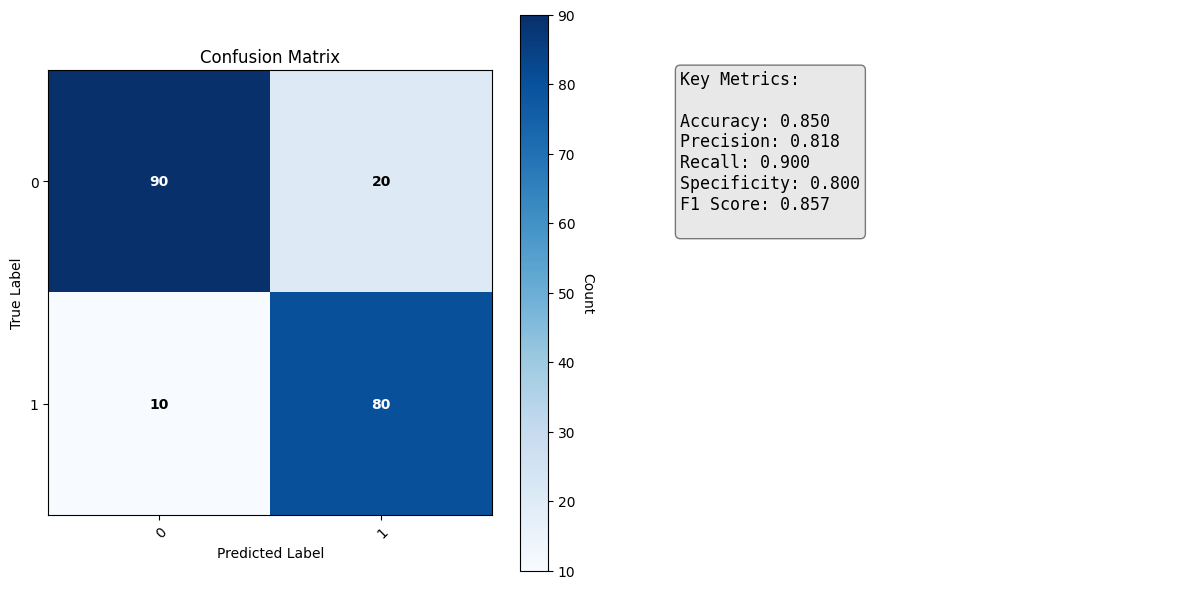

In [30]:
# Plot confusion matrix with metrics
fig = model_new.plot(show_metrics=True, normalize=False, cmap='Blues')
# fig.show()  # Uncomment to display inline

---

# Summary: Why DConfusion?

## 🎯 Four Standout Features:

1. **Research-Based Warnings** - Catch data leakage, sample issues, misleading metrics
2. **Statistical Testing** - Bootstrap CIs and McNemar's test built-in
3. **Cost-Sensitive Analysis** - Connect ML metrics to business ROI
4. **Metric Completion** - Reconstruct matrices from research papers (UNIQUE!)

## 💡 Key Benefits:

- Prevents costly mistakes before production
- Statistically rigorous model comparison
- Business-focused decision making
- Research validation and reproduction
- Beautiful web UI for stakeholders

## 🚀 Get Started:

```bash
pip install dconfusion
```

---

# Questions?

**Thank you!**